                                               review Sentiments
0   I'm reading a lot of reviews saying that this ...   Positive
1   This soundtrack is my favorite music of all ti...   Positive
2   I truly like this soundtrack and I enjoy video...   Positive
3   If you've played the game, you know how divine...   Positive
4   I am quite sure any of you actually taking the...   Positive
..                                                ...        ...
95  Trains, shapes and pegs - a winning combinatio...   Positive
96  I remember getting this book so faintly that t...   Negative
97  I think that the Deodato concerts are very ric...   Positive
98  These tracks are not the "original" versions b...   Negative
99  Book shipped quickly and was in excellent cond...   Positive

[100 rows x 2 columns]

Sentiment Distribution:
Sentiments
Positive    76.51
Negative    21.17
Neutral      2.32
Name: proportion, dtype: float64


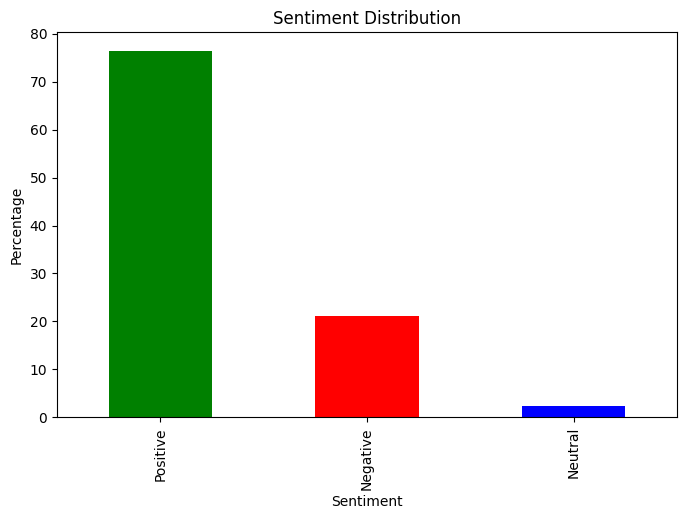


Top 10 Recurring Themes:
the: 76379 occurrences
and: 41895 occurrences
i: 39573 occurrences
a: 37938 occurrences
to: 37109 occurrences
of: 31434 occurrences
it: 29955 occurrences
this: 28231 occurrences
is: 27532 occurrences
in: 18235 occurrences


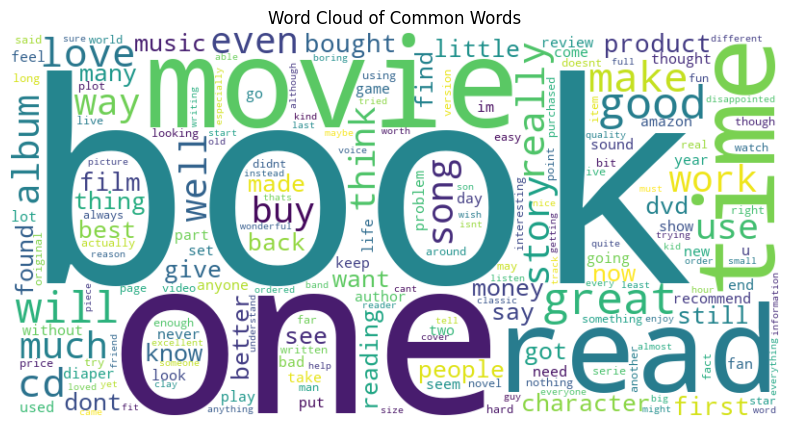

In [4]:
# Importing required libraries
import pandas as pd  # For handling and processing datasets
from textblob import TextBlob  # For performing sentiment analysis
from collections import Counter  # For counting the frequency of words
from wordcloud import WordCloud  # For creating a word cloud visualization
import matplotlib.pyplot as plt  # For creating visualizations
import re  # For cleaning and processing text

# Function to load the reviews dataset
def load_data(file_path):
    """
    Load the dataset from the specified file path.
    """
    data = pd.read_csv(file_path)  # Load the CSV file into a pandas DataFrame
    return data  # Return the loaded DataFrame

# Function to analyze sentiments on reviews
def analyze_sentiments(text_column):
    """
    Analyze sentiments of reviews and return a Series with sentiments.
    """
    # Nested function to calculate sentiment for each text
    def get_sentiment(review):
        polarity = TextBlob(review).sentiment.polarity  # Calculate the polarity score of a review
        if polarity > 0:
            return "Positive"
        elif polarity < 0:
            return "Negative"
        else:
            return "Neutral"
    
    # Apply sentiment analysis to each review in the column
    sentiments = text_column.apply(get_sentiment)
    return sentiments  # Return the sentiments as a Series

# Function to summarize sentiment distribution
def summarize_sentiments(reviews):
    """
    Summarize the sentiment distribution in the dataset.
    """
    sentiment_counts = reviews['Sentiments'].value_counts(normalize=True) * 100  # Calculate percentage of each sentiment
    print("\nSentiment Distribution:")
    print(sentiment_counts)  # Print the sentiment distribution as percentages
    
    # Create a bar chart for the sentiment distribution
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], figsize=(8, 5))
    plt.title("Sentiment Distribution")  # Set the title of the chart
    plt.xlabel("Sentiment")  # Label the x-axis
    plt.ylabel("Percentage")  # Label the y-axis
    plt.show()  # Display the bar chart

# Function to extract recurring themes
def extract_themes(text_column):
    """
    Extract recurring themes or words from customer reviews.
    """
    # Clean and tokenize text
    def clean_text(text):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert the text to lowercase
        return text

    cleaned_texts = text_column.apply(clean_text)  # Apply the cleaning function to each review
    all_words = " ".join(cleaned_texts).split()  # Combine all reviews into one string and split into words
    common_words = Counter(all_words).most_common(10)  # Count the top 10 most common words
    
    print("\nTop 10 Recurring Themes:")
    for word, count in common_words:  # Print the most common words with their counts
        print(f"{word}: {count} occurrences")

    # Generate a word cloud for visualization
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
    plt.axis("off")  # Turn off the axes
    plt.title("Word Cloud of Common Words")  # Set the title of the word cloud
    plt.show()  # Display the word cloud

# Main function
def main():
    """
    Main function to load, analyze, and process the dataset.
    """
    file_path = "reviews.csv"  # Path to the dataset file
    reviews = load_data(file_path)  # Load the dataset

    # Analyze reviews sentiments by creating a new column for sentiments
    reviews['Sentiments'] = analyze_sentiments(reviews['review'])

    # Print the first 100 rows of reviews with their sentiments
    print(reviews.head(100))

    # Summarize the sentiment distribution
    summarize_sentiments(reviews)

    # Extract and display recurring themes in the reviews
    extract_themes(reviews['review'])

# Entry point of the program
if __name__ == "__main__":
    main()  # Run the main function
